## One feature (exam score) --> { admission, rejection }

### Sigmoid function

$ \sigma(x) = \frac{1}{1+e^{-x}}$

In [68]:
import numpy as np

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# testing the sigmoid function
sigmoid(0), sigmoid(-1), sigmoid(2.1)

(0.5, 0.2689414213699951, 0.8909031788043871)

### Loading data

In [69]:
X_raw=np.array([272,331,295,287,315,266,303,294,317,309])
O = np.ones(shape=(X_raw.shape[0],1))
X = np.concatenate([X_raw.reshape(-1,1),O],axis=1)
t=np.array([0,1,1,0,1,0,0,0,1,1])

In [70]:
print(X, '\n\n',t)

[[272.   1.]
 [331.   1.]
 [295.   1.]
 [287.   1.]
 [315.   1.]
 [266.   1.]
 [303.   1.]
 [294.   1.]
 [317.   1.]
 [309.   1.]] 

 [0 1 1 0 1 0 0 0 1 1]


#### Newton's Method
$$\mathbf w_{i+1} = \mathbf w_i - \eta (X^\top R X)^{-1} X^\top (\mathbf y-\mathbf t)$$
where $y_n=\sigma(\mathbf x_n \mathbf w)$ and $R=\mathrm{diag}( y_n(1-y_n))$.

In [71]:
w=np.array([0,0])   # initial value
for i in range (0,10):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w=w-np.linalg.inv(X.T@R@X)@X.T@(y-t) # \eta=1
    print(w)


[  0.07789626 -23.28319321]
[  0.12827731 -38.43122697]
[  0.16949876 -50.83886733]
[  0.18832434 -56.49375121]
[  0.19095149 -57.28091649]
[  0.19099424 -57.293701  ]
[  0.19099426 -57.29370435]
[  0.19099426 -57.29370435]
[  0.19099426 -57.29370435]
[  0.19099426 -57.29370435]


In [72]:
def decision(x):
    return sigmoid(w[0]*x+w[1])

In [73]:
print(decision(320))
print(decision(299))
print(decision(150))


0.9786361045459087
0.45352903926686133
3.629301582117064e-13


 ## Two features (GRE %, GPA %) --> { admission, rejection }

### Loading Data

In [74]:
import numpy as np
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.layouts import gridplot
output_notebook()
from sklearn.linear_model import LogisticRegression

Loading BokehJS ...

In [75]:
data = np.genfromtxt('exam.csv',delimiter=',')

In [76]:
data.shape

(110, 3)

In [77]:
data[:5,:]

array([[96., 88.,  1.],
       [64., 83.,  1.],
       [99., 92.,  1.],
       [81., 69.,  0.],
       [73., 76.,  0.]])

In [78]:
X_raw = data[:,:2]
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

t = data[:,-1]

### Built-in Classifier

In [79]:
clf = LogisticRegression(solver='lbfgs').fit(X, t)
clf.score(X,t)

0.8454545454545455

### Plotting of Data

In [80]:
f=figure(width=500,height=400,title='Admissions')
f.scatter(X[t==1,0],X[t==1,1],color="red",marker="o", size=4,legend_label='Admit')
f.scatter(X[t==0,0],X[t==0,1],color="blue",marker="o", size=4,legend_label='Reject')
f.xaxis.axis_label='GRE'
f.yaxis.axis_label='GPA'
f.legend.location = "bottom_left"
show(f)

### Applying Newton's Method

In [81]:
w=np.array([0,0,0])
for i in range (0,10):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w=w-np.linalg.inv(X.T@R@X)@X.T@(y-t)
    print(w)


[ 0.03188931  0.06146783 -7.25018839]
[  0.04757266   0.12178934 -13.32933715]
[  0.05913424   0.18381012 -19.23744654]
[  0.06622808   0.2253133  -23.12692142]
[  0.06835078   0.23770912 -24.28352366]
[  0.06849556   0.2385381  -24.36081727]
[  0.06849617   0.23854149 -24.36113369]
[  0.06849617   0.23854149 -24.3611337 ]
[  0.06849617   0.23854149 -24.3611337 ]
[  0.06849617   0.23854149 -24.3611337 ]


In [82]:
def decision_2(x1,x2):
    return sigmoid(w[0]*x1+w[1]*x2+w[2])

In [83]:
print(decision_2(97,89))
print(decision_2(31,97))
print(decision_2(42,54))

0.9710606609150407
0.7111080684927299
0.0001835106538869324


### Plotting the decision boundary

When $\mathbf x \mathbf w =x_1 w_1 + x_2 w_2+w_3=0$, the probability is 0.5.

In [84]:
x_value= np.array([np.min(X[:,0]),np.max(X[:,0])])
y_value=-(w[0]*x_value+w[2])/w[1]
f.line(x_value,y_value,color='green')
show(f)

### Predictions and Accuracy

In [85]:
y_pred=(sigmoid(X@w).round())

In [86]:
y_pred

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0.])

In [87]:
print("Train Accuracy:", sum(t==y_pred)*100/len(t),"%")

Train Accuracy: 84.54545454545455 %


## Titanic

The data is adapted from that available at

https://www.kaggle.com/heptapod/titanic

$x_{n,1}$ = Age, &emsp;
$x_{n,2}$ = Fare, &emsp;
$t_n$ = $0,1$ (death, survival)

### Loading Data

In [88]:
import numpy as np
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.layouts import gridplot
output_notebook()
from sklearn.linear_model import LogisticRegression

Loading BokehJS ...

In [89]:
data = np.genfromtxt('titanic-1.csv',delimiter=',')

In [90]:
data.shape

(1309, 3)

In [91]:
data[:5,:]

array([[22.    ,  7.25  ,  0.    ],
       [38.    , 71.2833,  1.    ],
       [26.    ,  7.925 ,  1.    ],
       [35.    , 53.1   ,  1.    ],
       [35.    ,  8.05  ,  0.    ]])

In [92]:
sum(data[:,2]==1)

342

In [93]:
X_raw = data[:,:2]
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

t = data[:,-1]

In [94]:
X[:5,:]

array([[22.    ,  7.25  ,  1.    ],
       [38.    , 71.2833,  1.    ],
       [26.    ,  7.925 ,  1.    ],
       [35.    , 53.1   ,  1.    ],
       [35.    ,  8.05  ,  1.    ]])

### Built-in Classifier

In [95]:
clf = LogisticRegression(random_state=1,solver='lbfgs').fit(X, t)
clf.score(X,t)

0.7333842627960275

### Plotting of Data

In [96]:
f=figure(width=500,height=400,title='Titanic')
f.scatter(X[t==1,0],X[t==1,1],color="red",marker="o", size=4,legend_label='Survival')
f.scatter(X[t==0,0],X[t==0,1],color="blue",marker="o", size=4,legend_label='Death')
f.xaxis.axis_label='Age'
f.yaxis.axis_label='Fare'
f.legend.location = "top_left"
show(f)

### Applying Newton's Method

In [97]:
w=np.array([0,0,0])
for i in range (0,10):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w=w-np.linalg.inv(X.T@R@X)@X.T@(y-t)
    print(w)


[-0.01221559  0.00644746 -0.80910715]
[-0.01598901  0.00765168 -0.8441549 ]
[-0.01625245  0.00771614 -0.84264754]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]


In [98]:
def decision_2(x1,x2):
    return sigmoid(w[0]*x1+w[1]*x2+w[2])

In [99]:
print(decision_2(30,7))
print(decision_2(30,300))

0.21819413269224372
0.7280313389499435


### Plotting the decision boundary

In [100]:
x_value= np.array([np.min(X[:,0]),np.max(X[:,0])])
y_value=-(w[0]*x_value+w[2])/w[1]
f.line(x_value,y_value,color='green')
show(f)

### Predictions and Accuracy

In [101]:
y_pred=(sigmoid(X@w).round())

In [102]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [103]:
print("Train Accuracy:", sum(t==y_pred)*100/len(t),"%")

Train Accuracy: 73.33842627960276 %


### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

$x_{n,1}$=age, $x_{n,2}$= year, $x_{n,3}$= number of axillary nodes,

$t=1,2$ (survival, death)

In [104]:
import numpy as np
from sklearn.model_selection import train_test_split

In [105]:
data=np.genfromtxt('haberman.data',delimiter=',')

In [106]:
data[:10,:]

array([[30., 64.,  1.,  1.],
       [30., 62.,  3.,  1.],
       [30., 65.,  0.,  1.],
       [31., 59.,  2.,  1.],
       [31., 65.,  4.,  1.],
       [33., 58., 10.,  1.],
       [33., 60.,  0.,  1.],
       [34., 59.,  0.,  2.],
       [34., 66.,  9.,  2.],
       [34., 58., 30.,  1.]])

In [107]:
t_raw = data[:,-1]
X_raw = data[:,:3]

In [108]:
t_raw[:10]

array([1., 1., 1., 1., 1., 1., 1., 2., 2., 1.])

In [109]:
X_raw[:10,:]

array([[30., 64.,  1.],
       [30., 62.,  3.],
       [30., 65.,  0.],
       [31., 59.,  2.],
       [31., 65.,  4.],
       [33., 58., 10.],
       [33., 60.,  0.],
       [34., 59.,  0.],
       [34., 66.,  9.],
       [34., 58., 30.]])

In [110]:
t = t_raw%2    # 0: death; 1: survival
O = np.ones(shape=(X_raw.shape[0],1))
X = np.concatenate([X_raw,O],axis=1)
X.shape

(306, 4)

### Splitting the data

We split the data set into two parts: one for train and the other for test.

In [111]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(214, 4) (214,)
(92, 4) (92,)


In [112]:
X_train[:10,:]

array([[53., 58.,  1.,  1.],
       [30., 62.,  3.,  1.],
       [38., 69., 21.,  1.],
       [54., 59.,  7.,  1.],
       [34., 58., 30.,  1.],
       [42., 61.,  4.,  1.],
       [38., 59.,  2.,  1.],
       [56., 60.,  0.,  1.],
       [40., 58.,  0.,  1.],
       [70., 59.,  8.,  1.]])

Define the function $\sigma(x) = \dfrac {e^x}{e^x+1}= \dfrac 1 {1+e^{-x}}$.

In [113]:
def sigmoid(x):    
    return 1/ (1 + np.exp(-x))

Define the error function
$$ E (\mathbf{w}) = - \frac 1 N \sum_{n=1}^N \{ t_n \ln y_n + (1-t_n) \ln (1-y_n)\},  $$
where $y_n=\sigma(w_1 x_{n1}+ w_2 x_{n2} + \cdots + w_k x_{nk}+w_{k+1} )$. 

This function will be obtained in Logistic Regression.

In [114]:
def Er(w):
    yn=sigmoid(X_train@w)
    return -(1/n_train)*sum(t_train*np.log(yn)+(1-t_train)*np.log(1-yn))

The gradient of $E$ is given by

$$\nabla E= \left [ \frac 1 N \sum_{n=1}^N (y_n-t_n)x_{nj} \right ] = \frac 1 N X^\top (\mathbf y - \mathbf t).$$


In [115]:
def gradE(w):
    yn=sigmoid(X_train@w)
    return X_train.T@(yn-t_train)/n_train

Set the initial values.

In [116]:
w=np.array([0,0,0,0])
eta=0.0005
iter_num=10000

Run a loop for gradient descent.

In [117]:
for i in range(iter_num):
    w=w-eta*gradE(w)
    if i%1000==0:
        print(w,Er(w))

[5.64252336e-03 7.03855140e-03 4.43925234e-05 1.12149533e-04] 0.5968673150391269
[-0.02249273  0.04046565 -0.08751212  0.00096521] 0.5495291865538697
[-0.022997    0.04102111 -0.08928589  0.00138575] 0.549514442405544
[-0.0230099   0.04102884 -0.08933067  0.00179929] 0.549514091562148
[-0.02301069  0.04102301 -0.08933196  0.00221256] 0.5495137499015216
[-0.02301118  0.04101684 -0.08933216  0.00262573] 0.5495134084007969
[-0.02301166  0.04101067 -0.08933233  0.00303881] 0.5495130670541599
[-0.02301214  0.04100449 -0.0893325   0.0034518 ] 0.5495127258615375
[-0.02301262  0.04099832 -0.08933266  0.00386469] 0.5495123848228609
[-0.0230131   0.04099215 -0.08933283  0.00427749] 0.5495120439380601


In [118]:
print(w)

[-0.02301358  0.04098598 -0.089333    0.00468979]


We compute the accuracy of the trained model.

In [119]:
t_pred=sigmoid(X_test@w).round()
print("Train Accuracy:", sum(t_test==t_pred)*100/n_test,"%")

Train Accuracy: 78.26086956521739 %


### Fashion MNIST

In [120]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split

In [121]:
data=np.genfromtxt('f-mnist-train.csv',skip_header=1,delimiter=',')

In [122]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' )

In [123]:
data[:11,:]

array([[ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 1.,  9.,  0., ...,  0.,  0.,  0.],
       [ 2.,  6.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 8.,  4.,  0., ...,  0.,  0.,  0.],
       [ 9.,  8.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.]])

In [124]:
data[0,2:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         4.,   0.,   0.,   0.,   0.,   0.,  62.,  61.,  21.,  29.,  23.,
        51., 136.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88., 201.,
       228., 225., 255., 115.,  62., 137., 255., 235., 222., 255., 135.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  47., 252., 234., 238., 224., 21

In [125]:
data.shape # 28 x 28 = 784

(60000, 786)

In [126]:
t_raw = data[:,1]
X_raw = data[:,2:]

In [127]:
t_raw[:10]

array([2., 9., 6., 0., 3., 4., 4., 5., 4., 8.])

In [128]:
X_raw.shape

(60000, 784)

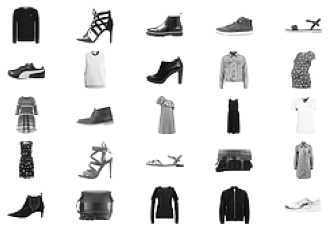

In [129]:
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.imshow(X_raw[randint(0, X_raw.shape[0])].reshape(28,28), cmap='Greys')

In [130]:
def to_binary(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0,0,0,0,0,0,0,0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

array=np.array([2,3,1,0,9])
rr=to_binary(array)
print(rr)

def to_class(array):
    for i in range(10):
        if array[i] == 1:
            return classes[i]
        
to_class([0,1,0,0,0,0,0,0,0,0])

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


'Trouser'

In [131]:
t = to_binary(t_raw)  
O = np.ones(shape=(X_raw.shape[0],1))
X = np.concatenate([X_raw,O],axis=1)
X.shape, t.shape

((60000, 785), (60000, 10))

In [132]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(42000, 785) (42000, 10)
(18000, 785) (18000, 10)


Define the function $$ \mathbf{\sigma}(\mathbf a) = \left ( \frac { e^{a_1}}{ \sum_{i=1}^s e^{a_i}}, \dots ,  \frac { e^{a_s}}{ \sum_{i=1}^s e^{a_i}}\right ) ,$$ where $\mathbf a=(a_1, a_2, \dots , a_s)$.


In [133]:
def musig(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [134]:
a=np.array([[0,0,0],[0,0,0]])
b=np.array([-1,0,2])
musig(a), musig(b)

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([0.04201007, 0.1141952 , 0.84379473]))

Define the error function
$$ E (\mathbf{w}) = - \frac 1 N \sum_{n=1}^N \sum_{m=1}^s t_{n,m} \ln y_{n,m},  $$
where $\mathbf y=\sigma(X \mathbf w) = [y_{n,m}] $. 

In [135]:
def Er(w):
    y=musig(X_train@w)
    return -np.sum(t_train*y)/n_train

In [136]:
Er(np.zeros((785,10)))

-0.10000000000000006

The gradient of $E$ is given by

$$\nabla E= \left [ \frac 1 N \sum_{n=1}^N (y_n-t_n)x_{nj} \right ] = \frac 1 N X^\top (\mathbf y - \mathbf t).$$


In [137]:
def gradE(w):
    y=musig(X_train@w)
    return X_train.T@(y-t_train)/n_train

Set the initial values.

In [138]:
w=np.zeros((785,10))
eta=0.000005
iter_num=1000

Run a loop for gradient descent.

In [139]:
for i in range(iter_num):
    w=w-eta*gradE(w)
    if i%200==0:
        print(Er(w))

print(Er(w))

-0.18363001147760527
-0.6982588373539406
-0.7213169097135891
-0.721496519769611
-0.738107916473364
-0.7568375357771536


We compute the accuracy of the trained model.

In [140]:
t_p=musig(X_test@w)
t_pred=np.floor(t_p/np.max(t_p,axis=1, keepdims=True))

In [141]:
accuracy=np.sum(np.all(t_pred == t_test, axis=1))*100/n_test
print("Accuracy with Test:", accuracy.round(4),"%")

Accuracy with Test: 81.1111 %


Prediction: Ankle boot


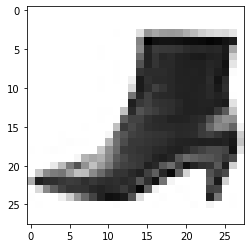

In [143]:
rd=randint(0,n_test)
plt.imshow(X_test[rd,:-1].reshape(28,28), cmap='Greys')
print('Prediction:', to_class(t_pred[rd]))

### MNIST of hand-written digits

In [144]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split

In [145]:
data=np.genfromtxt('mnist_train.csv',skip_header=1,delimiter=',')

In [146]:
data[:11,:]

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [147]:
data[0,1:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [148]:
data.shape # 28 x 28 = 784

(60000, 785)

In [149]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [150]:
t_raw[:10]

array([5., 0., 4., 1., 9., 2., 1., 3., 1., 4.])

In [151]:
X_raw.shape

(60000, 784)

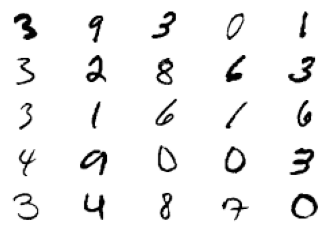

In [152]:
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.imshow(X_raw[randint(0, X_raw.shape[0])].reshape(28,28), cmap='Greys')

In [67]:
# Write a code for logistic regression